<a href="https://colab.research.google.com/github/Aneela2106/IT496/blob/main/AneelaB_496Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanicTrain=pd.read_csv('/content/drive/MyDrive/it 496/cleanTitanicTrain.csv')
titanicTest=pd.read_csv('/content/drive/MyDrive/it 496/cleanTitanicTest.csv')

In [7]:
predictorNames=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
trainPredictors = titanicTrain[predictorNames]

#create a list with a single value
targetName=["Survived"]
trainTarget = titanicTrain["Survived"]

#you do the same to pick 7 to 12
testPredictors= titanicTest[predictorNames]

In [47]:
#create an instance of the decision tree with specific parameters
DT= DecisionTreeClassifier(max_depth=4, criterion='entropy', splitter='random', min_samples_leaf=50, max_leaf_nodes=6)
#training the decision tree instance you created
DT.fit(trainPredictors,trainTarget)

#test the trained model on "unseen" data
testTarget = DT.predict(testPredictors)
#train dataset accuracy - this is accuracy on seen data, not unseen data

#the accuracy of model for training data
acc_decision_tree = round(DT.score(trainPredictors, trainTarget) * 100, 2)
print (acc_decision_tree)

#we need accuracy for test on data

81.14


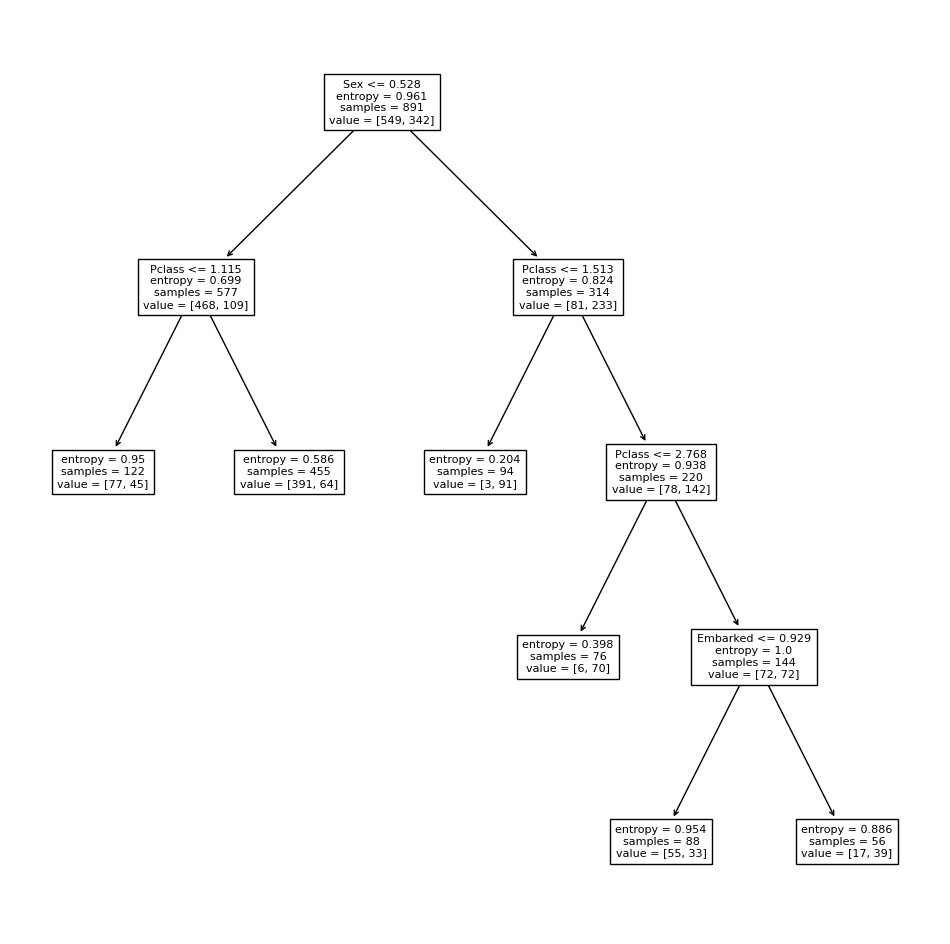

In [50]:

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(DT, fontsize=8, feature_names=predictorNames)
plt.savefig('tree_high_dpi', dpi=500)


In [51]:
testPIDs=titanicTest['PassengerId']
mySubmission=pd.DataFrame({'PassengerID': testPIDs, 'Survived': testTarget})
mySubmission.to_csv('/content/drive/MyDrive/it 496/mySubmision.csv', index=False)
